# Interpolation

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

% matplotlib inline

## Functions

### Factor-2 Interpolation

In [2]:
def fac_2_interpolator(xu):
    x_axis = len(xu)
    #y = [xu[0]+0.5*xu[1]]
    xu = xu+[0]
    y = [xu[n]+0.5*(xu[n-1]+xu[n+1]) for n in range(0,x_axis)]
    #y.append(xu[-1]+0.5*xu[-2])
    return y

### Factor-3 Interpolation

In [3]:
def fac_3_interpolator(xu):
    x_axis = len(xu)
    xu = xu+[0, 0]
    y = [xu[n]+(2/3)*(xu[n-1]+xu[n+1])+(1/3)*(xu[n-2]+xu[n+2]) for n in range(0,x_axis)]
    return y

### Padding

In [4]:
def find_xu(x, order):
    return [x[n//order] if n%order == 0 else 0 for n in range(order*len(x))]

### RMSE Error

In [5]:
def error_rmse(x, y):
    d = x-y
    s = sum([i*i for i in d])/len(x)
    return s

### Testing with example in class

In [6]:
x = [0,1,2,3,4,3]

In [7]:
xu = find_xu(x, 2)
xu

[0, 0, 1, 0, 2, 0, 3, 0, 4, 0, 3, 0]

In [8]:
fac_2_interpolator(xu)

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 3.5, 3.0, 1.5]

## For sin signal

Frequency of 10Hz

In [9]:
fs = 10
t = np.linspace(0,1/fs,11)[:-1]

Sin with 10 Samples/Cycle

In [10]:
x = np.sin(2*pi*fs*t)

10 Samples/cycle plot

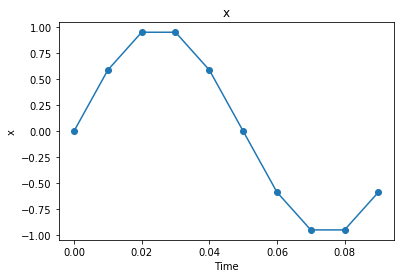

In [11]:
plt.plot(t, x, '-o')
plt.title('x')
plt.xlabel('Time')
plt.ylabel('x')
plt.show()

Padding with zeros and creating a list of new times

In [12]:
xu_2 = find_xu(x, 2)
fs_2 = 20
t_2 = np.linspace(0,1/fs,21)[:-1]

Finding Y

In [13]:
y_2 = fac_2_interpolator(xu_2)

Plotting Y

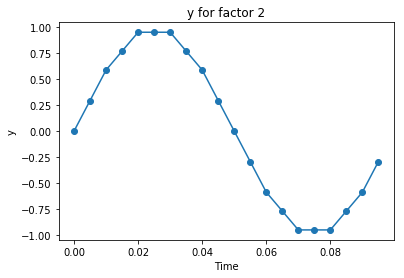

In [14]:
plt.plot(t_2, y_2, '-o')
plt.title('y for factor 2')
plt.xlabel('Time')
plt.ylabel('y')
plt.show()

Comparing y with x

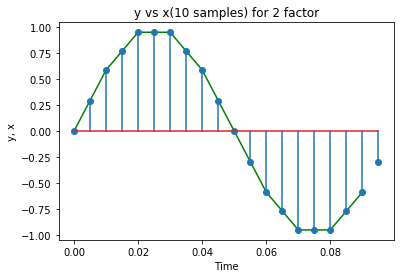

In [15]:
plt.plot(t, x, 'g')
plt.stem(t_2, y_2)
plt.title('y vs x(10 samples) for 2 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

true 20 sampled signal

In [16]:
x_2 = np.sin(2*pi*fs*t_2)

Comparing True signal with y

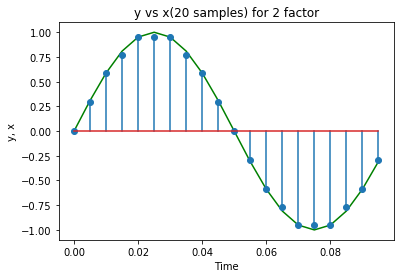

In [17]:
plt.plot(t_2, x_2, 'g')
plt.stem(t_2, y_2)
plt.title('y vs x(20 samples) for 2 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

RMSE of Factor-2

In [18]:
rmse_2 = error_rmse(y_2, x_2)

In [19]:
print('RMSE of Factor-2 Interpolation is:', rmse_2)

RMSE of Factor-2 Interpolation is: 0.000598866149292


### Factor-3 Interpolation

Padding x by 2 zeros and creating new time axis

In [20]:
xu_3 = find_xu(x, 3)
fs_3 = 30
t_3 = np.linspace(0,1/fs,31)[:-1]

Y for factor-3 interpolation

In [21]:
y_3 = fac_3_interpolator(xu_3)

Comparing Y with x

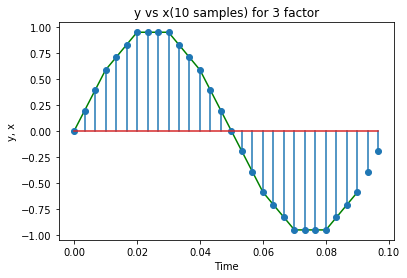

In [22]:
plt.plot(t, x, 'g')
plt.stem(t_3, y_3)
plt.title('y vs x(10 samples) for 3 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

True signal with 30 Samples

In [23]:
x_3 = np.sin(2*pi*fs*t_3)

Comparing True signal with y

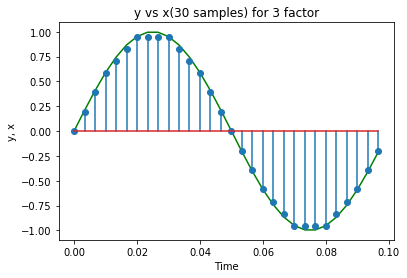

In [24]:
plt.plot(t_3, x_3, 'g')
plt.stem(t_3, y_3)
plt.title('y vs x(30 samples) for 3 factor')
plt.xlabel('Time')
plt.ylabel('y, x')
plt.show()

RMSE of Factor-3

In [25]:
rmse_3 = error_rmse(y_3, x_3)

In [26]:
print('RMSE of Factor-3 Interpolation is:', rmse_3)

RMSE of Factor-3 Interpolation is: 0.00063051936439


In [30]:
def rmse_variation():
    w = np.linspace(0.1, 10, 20)
    t = [np.linspace(0, i, 11)[:-1] for i in w]
    t_2 = [np.linspace(0, i, 21)[:-1] for i in w]
    t_3 = [np.linspace(0, i, 31)[:-1] for i in w]
    x_sin = [np.sin(2*pi*t[i]*w[i]) for i in range(len(w))]
    y_2 = [fac_2_interpolator(find_xu(i, 2)) for i in x_sin]
    y_3 = [fac_3_interpolator(find_xu(i, 3)) for i in x_sin]
    x_2 = [np.sin(2*pi*t_2[i]*w[i]) for i in range(len(w))]
    x_3 = [np.sin(2*pi*t_3[i]*w[i]) for i in range(len(w))]
    rmse_2 = [error_rmse(x_2[i], y_2[i]) for i in range(len(x_2))]
    plt.plot(rmse_2)
    return

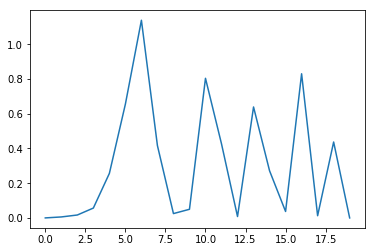

In [31]:
rmse_variation()